## In this example, I will try to foresee water quality for each beach in Chicago

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.subplots_adjust(wspace=10, hspace=10)

<Figure size 432x288 with 0 Axes>

## First read the data

In [137]:
data = pd.read_csv("D://Projeler//Chicago_Beach_Water//bwq.csv")
print(data.columns)

Index(['Beach Name', 'Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID'],
      dtype='object')


In [138]:
print("These are total {} which are {}".format(len(data["Beach Name"].unique()),data["Beach Name"].unique()))
beaches = list(data["Beach Name"].unique())
beaches

These are total 6 which are ['Montrose Beach' 'Ohio Street Beach' 'Calumet Beach' '63rd Street Beach'
 'Osterman Beach' 'Rainbow Beach']


['Montrose Beach',
 'Ohio Street Beach',
 'Calumet Beach',
 '63rd Street Beach',
 'Osterman Beach',
 'Rainbow Beach']

## We create 6 different data for each beach

In [139]:
beaches_data = [data.loc[data['Beach Name'] == str(x)] for x in beaches]

In [140]:
beaches_data[0]

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,08/30/2013 08:00:00 AM,20.3,1.18,0.891,0.080,3.0,9.4,8/30/2013 8:00 AM,MontroseBeach201308300800
4,Montrose Beach,05/28/2014 12:00:00 PM,14.4,3.36,1.388,0.298,4.0,11.9,5/28/2014 12:00 PM,MontroseBeach201405281200
5,Montrose Beach,05/28/2014 01:00:00 PM,14.5,2.72,1.395,0.306,3.0,11.9,5/28/2014 1:00 PM,MontroseBeach201405281300
7,Montrose Beach,05/28/2014 02:00:00 PM,14.8,2.97,1.386,0.328,3.0,11.9,5/28/2014 2:00 PM,MontroseBeach201405281400
10,Montrose Beach,05/28/2014 03:00:00 PM,14.5,4.30,1.377,0.328,3.0,11.9,5/28/2014 3:00 PM,MontroseBeach201405281500
12,Montrose Beach,05/28/2014 04:00:00 PM,14.4,4.87,1.366,0.341,3.0,11.9,5/28/2014 4:00 PM,MontroseBeach201405281600
14,Montrose Beach,05/28/2014 05:00:00 PM,14.1,5.06,1.382,0.340,4.0,11.9,5/28/2014 5:00 PM,MontroseBeach201405281700
15,Montrose Beach,05/28/2014 06:00:00 PM,14.2,5.76,1.415,0.356,3.0,11.9,5/28/2014 6:00 PM,MontroseBeach201405281800
18,Montrose Beach,05/28/2014 07:00:00 PM,14.2,6.32,1.386,0.346,3.0,11.9,5/28/2014 7:00 PM,MontroseBeach201405281900
19,Montrose Beach,05/28/2014 08:00:00 PM,14.4,6.89,1.401,0.380,4.0,11.9,5/28/2014 8:00 PM,MontroseBeach201405282000


## We can delete Measurement Timestamp Column since we have it twice
## Then we need to 2 different column for date and time

In [141]:
beaches_data_cleaned = [beaches.drop(columns="Measurement Timestamp") for beaches in beaches_data]

In [142]:
for b in beaches_data_cleaned:
    b[['Date', 'Time']] = b['Measurement Timestamp Label'].str.split(' ', 1, expand=True)

In [143]:
beaches_data_cleaned[0]

,Beach Name,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Date,Time
0,Montrose Beach,20.3,1.18,0.891,0.080,3.0,9.4,8/30/2013 8:00 AM,MontroseBeach201308300800,8/30/2013,8:00 AM
4,Montrose Beach,14.4,3.36,1.388,0.298,4.0,11.9,5/28/2014 12:00 PM,MontroseBeach201405281200,5/28/2014,12:00 PM
5,Montrose Beach,14.5,2.72,1.395,0.306,3.0,11.9,5/28/2014 1:00 PM,MontroseBeach201405281300,5/28/2014,1:00 PM
7,Montrose Beach,14.8,2.97,1.386,0.328,3.0,11.9,5/28/2014 2:00 PM,MontroseBeach201405281400,5/28/2014,2:00 PM
10,Montrose Beach,14.5,4.30,1.377,0.328,3.0,11.9,5/28/2014 3:00 PM,MontroseBeach201405281500,5/28/2014,3:00 PM
12,Montrose Beach,14.4,4.87,1.366,0.341,3.0,11.9,5/28/2014 4:00 PM,MontroseBeach201405281600,5/28/2014,4:00 PM
14,Montrose Beach,14.1,5.06,1.382,0.340,4.0,11.9,5/28/2014 5:00 PM,MontroseBeach201405281700,5/28/2014,5:00 PM
15,Montrose Beach,14.2,5.76,1.415,0.356,3.0,11.9,5/28/2014 6:00 PM,MontroseBeach201405281800,5/28/2014,6:00 PM
18,Montrose Beach,14.2,6.32,1.386,0.346,3.0,11.9,5/28/2014 7:00 PM,MontroseBeach201405281900,5/28/2014,7:00 PM
19,Montrose Beach,14.4,6.89,1.401,0.380,4.0,11.9,5/28/2014 8:00 PM,MontroseBeach201405282000,5/28/2014,8:00 PM


## We can delete measurementID column

In [144]:
beaches_data_cleaned = [beaches.drop(columns="Measurement ID") for beaches in beaches_data_cleaned]

In [145]:
beaches_data_cleaned[0]

,Beach Name,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Date,Time
0,Montrose Beach,20.3,1.18,0.891,0.080,3.0,9.4,8/30/2013 8:00 AM,8/30/2013,8:00 AM
4,Montrose Beach,14.4,3.36,1.388,0.298,4.0,11.9,5/28/2014 12:00 PM,5/28/2014,12:00 PM
5,Montrose Beach,14.5,2.72,1.395,0.306,3.0,11.9,5/28/2014 1:00 PM,5/28/2014,1:00 PM
7,Montrose Beach,14.8,2.97,1.386,0.328,3.0,11.9,5/28/2014 2:00 PM,5/28/2014,2:00 PM
10,Montrose Beach,14.5,4.30,1.377,0.328,3.0,11.9,5/28/2014 3:00 PM,5/28/2014,3:00 PM
12,Montrose Beach,14.4,4.87,1.366,0.341,3.0,11.9,5/28/2014 4:00 PM,5/28/2014,4:00 PM
14,Montrose Beach,14.1,5.06,1.382,0.340,4.0,11.9,5/28/2014 5:00 PM,5/28/2014,5:00 PM
15,Montrose Beach,14.2,5.76,1.415,0.356,3.0,11.9,5/28/2014 6:00 PM,5/28/2014,6:00 PM
18,Montrose Beach,14.2,6.32,1.386,0.346,3.0,11.9,5/28/2014 7:00 PM,5/28/2014,7:00 PM
19,Montrose Beach,14.4,6.89,1.401,0.380,4.0,11.9,5/28/2014 8:00 PM,5/28/2014,8:00 PM


## So, we need only full 24 hour. Thus, we delete #of measurement smaller than 24 in a day

In [146]:
for a in range(len(beaches_data_cleaned)):
    x=beaches_data_cleaned[a].groupby("Date").count()
    x = x.drop(x[x["Beach Name"]!=24].index)
    full_dates = list(x.index)
    print(len(beaches_data_cleaned[a].index))
    #     print(dropping_dates)
    beaches_data_cleaned[a] = beaches_data_cleaned[a][beaches_data_cleaned[a]['Date'].isin(full_dates)]
    print(len(beaches_data_cleaned[a].index))

7269
4752
9343
5880
7570
4800
3420
960
4023
2592
3298
1296


## Then, we drop Nan Values

In [147]:
[beaches.dropna(inplace=True) for beaches in beaches_data_cleaned]


D:\Anaconda\envs\TensorGPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[None, None, None, None, None, None]

In [148]:
beaches_data_cleaned[1]

,Beach Name,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Date,Time
465,Ohio Street Beach,16.8,1.21,1.557,0.127,3.0,12.3,06/07/2014 12:00 AM,06/07/2014,12:00 AM
468,Ohio Street Beach,16.6,0.97,1.534,0.104,2.0,12.3,06/07/2014 1:00 AM,06/07/2014,1:00 AM
471,Ohio Street Beach,16.6,0.95,1.470,0.089,3.0,12.3,06/07/2014 2:00 AM,06/07/2014,2:00 AM
474,Ohio Street Beach,16.6,0.97,1.482,0.087,4.0,12.2,06/07/2014 3:00 AM,06/07/2014,3:00 AM
477,Ohio Street Beach,17.6,1.04,1.495,0.175,6.0,12.1,06/07/2014 1:00 PM,06/07/2014,1:00 PM
480,Ohio Street Beach,16.6,1.04,1.533,0.080,2.0,12.2,06/07/2014 4:00 AM,06/07/2014,4:00 AM
483,Ohio Street Beach,17.0,0.81,1.550,0.078,3.0,12.2,06/07/2014 9:00 AM,06/07/2014,9:00 AM
486,Ohio Street Beach,16.8,8.21,1.756,0.360,4.0,11.9,06/08/2014 6:00 PM,06/08/2014,6:00 PM
489,Ohio Street Beach,16.5,0.79,1.549,0.071,2.0,12.2,06/07/2014 5:00 AM,06/07/2014,5:00 AM
492,Ohio Street Beach,16.6,0.71,1.575,0.068,2.0,12.2,06/07/2014 6:00 AM,06/07/2014,6:00 AM


## We convert date to date object to see min and max dates correctly

In [149]:
for b in beaches_data_cleaned:
    b['Date'] = pd.to_datetime(b['Date'], errors='coerce')
    b['Date'] = b ['Date'].dt.strftime('%Y/%m/%d')
    b = b.sort_values(by="Date")
beaches_data_cleaned[2]

D:\Anaconda\envs\TensorGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\envs\TensorGPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Beach Name,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Date,Time
73,Calumet Beach,16.6,1.79,1.539,0.210,4.0,11.7,5/30/2014 12:00 AM,2014/05/30,12:00 AM
75,Calumet Beach,16.4,1.74,1.437,0.176,4.0,11.7,5/30/2014 1:00 AM,2014/05/30,1:00 AM
78,Calumet Beach,16.4,1.53,1.579,0.193,4.0,11.7,5/30/2014 2:00 AM,2014/05/30,2:00 AM
79,Calumet Beach,16.3,1.72,1.564,0.176,4.0,11.7,5/30/2014 3:00 AM,2014/05/30,3:00 AM
82,Calumet Beach,16.2,1.77,1.513,0.168,3.0,11.7,5/30/2014 4:00 AM,2014/05/30,4:00 AM
83,Calumet Beach,16.2,1.60,1.465,0.152,3.0,11.7,5/30/2014 5:00 AM,2014/05/30,5:00 AM
86,Calumet Beach,16.1,1.53,1.500,0.144,3.0,11.7,5/30/2014 6:00 AM,2014/05/30,6:00 AM
87,Calumet Beach,16.1,1.71,1.559,0.132,3.0,11.7,5/30/2014 7:00 AM,2014/05/30,7:00 AM
89,Calumet Beach,16.2,1.68,1.496,0.127,3.0,11.7,5/30/2014 8:00 AM,2014/05/30,8:00 AM
92,Calumet Beach,16.3,1.59,1.453,0.108,3.0,11.6,5/30/2014 9:00 AM,2014/05/30,9:00 AM


In [150]:
for b in beaches_data_cleaned:
    b['Month'] = pd.DatetimeIndex(b['Date']).month

D:\Anaconda\envs\TensorGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [151]:
beaches_data_cleaned = [beaches.drop(columns="Measurement Timestamp Label") for beaches in beaches_data_cleaned]




In [152]:
beaches_data_cleaned[0]

,Beach Name,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Date,Time,Month
74,Montrose Beach,15.2,6.09,1.438,0.234,3.0,11.8,2014/05/30,12:00 AM,5
76,Montrose Beach,15.0,5.98,1.379,0.260,3.0,11.8,2014/05/30,1:00 AM,5
77,Montrose Beach,15.0,5.92,1.504,0.260,3.0,11.8,2014/05/30,2:00 AM,5
80,Montrose Beach,14.9,6.51,1.422,0.261,3.0,11.8,2014/05/30,3:00 AM,5
81,Montrose Beach,14.8,5.35,1.441,0.266,4.0,11.8,2014/05/30,4:00 AM,5
84,Montrose Beach,14.8,5.66,1.441,0.253,4.0,11.8,2014/05/30,5:00 AM,5
85,Montrose Beach,14.7,5.53,1.401,0.219,3.0,11.8,2014/05/30,6:00 AM,5
88,Montrose Beach,14.7,5.53,1.455,0.220,4.0,11.8,2014/05/30,7:00 AM,5
90,Montrose Beach,14.8,5.58,1.400,0.228,3.0,11.8,2014/05/30,8:00 AM,5
91,Montrose Beach,15.0,5.36,1.399,0.223,3.0,11.8,2014/05/30,9:00 AM,5


## Let's see how turbidity changes as months changes

<Figure size 432x288 with 0 Axes>

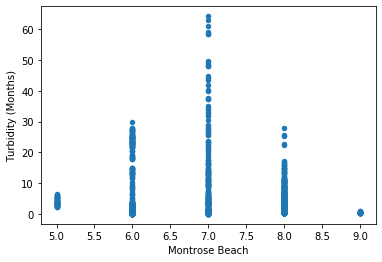

<Figure size 432x288 with 0 Axes>

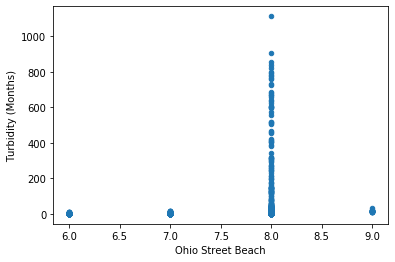

<Figure size 432x288 with 0 Axes>

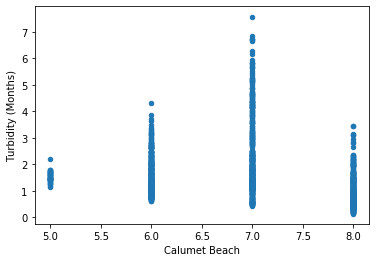

<Figure size 432x288 with 0 Axes>

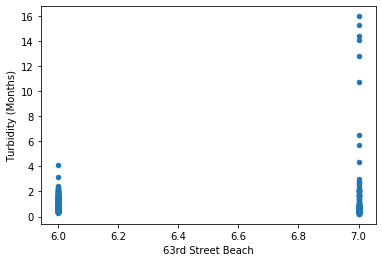

<Figure size 432x288 with 0 Axes>

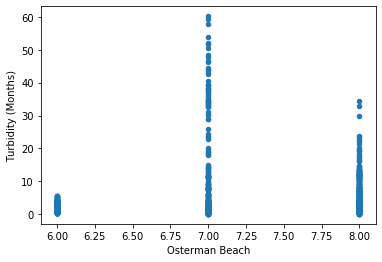

<Figure size 432x288 with 0 Axes>

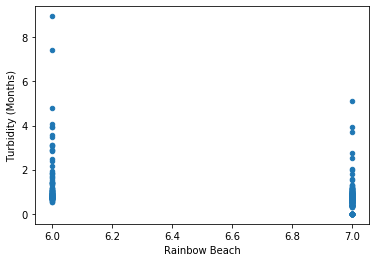

In [153]:
for b in beaches_data_cleaned:

    plt.figure()

    b.plot(x ='Month', y='Turbidity', kind = 'scatter')
    plt.xlabel(b['Beach Name'].values[0])
    plt.ylabel('Turbidity (Months)')
    plt.show()

## Correlation between the columns

In [154]:
correlation_df = beaches_data_cleaned[0].corr()
correlation_df

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Month
Water Temperature,1.000000,-0.113733,0.491382,0.090609,-0.022322,-0.491375,0.716624
Turbidity,-0.113733,1.000000,0.187668,0.729332,0.189338,0.179257,-0.057423
Transducer Depth,0.491382,0.187668,1.000000,0.317948,0.135193,-0.239141,0.608450
Wave Height,0.090609,0.729332,0.317948,1.000000,0.030900,0.078516,0.056992
Wave Period,-0.022322,0.189338,0.135193,0.030900,1.000000,-0.037711,0.152654
Battery Life,-0.491375,0.179257,-0.239141,0.078516,-0.037711,1.000000,-0.406403
Month,0.716624,-0.057423,0.608450,0.056992,0.152654,-0.406403,1.000000


## Select Water Temperature - Wave Height - Wave Period - Month for guessing turbidity

In [155]:
datasets_for_ANN = []
for b in beaches_data_cleaned:
    df = b[['Beach Name','Water Temperature', 'Wave Height', 'Wave Period', 'Month','Turbidity']]
    datasets_for_ANN.append(df)

In [156]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD


In [157]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss=loss, optimizer='adam')


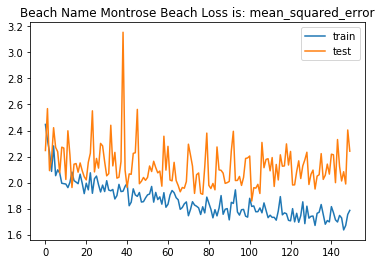

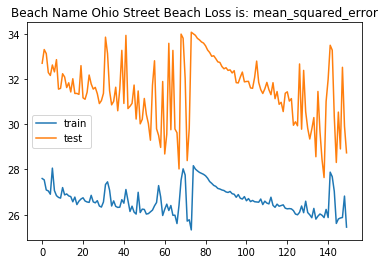

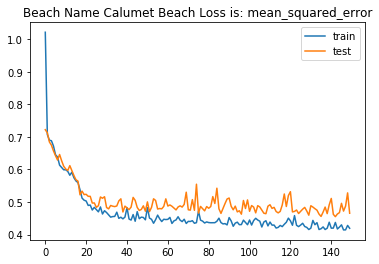

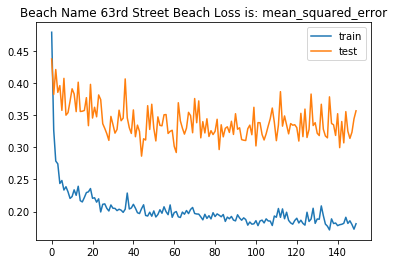

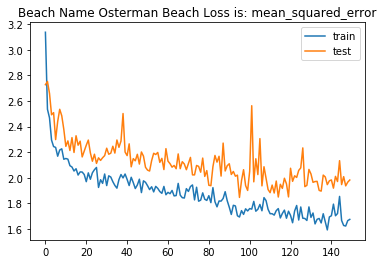

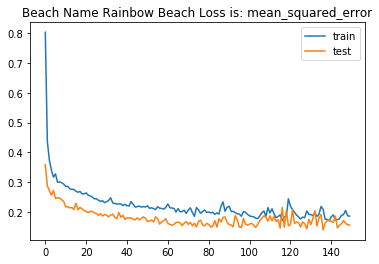

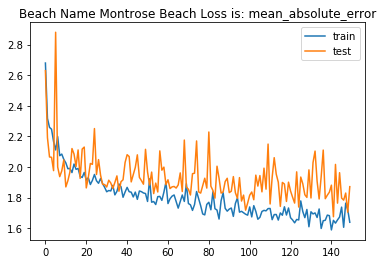

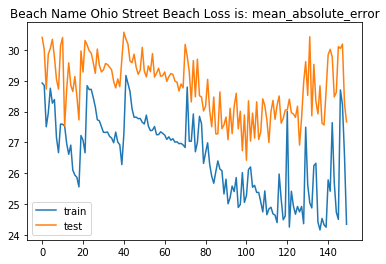

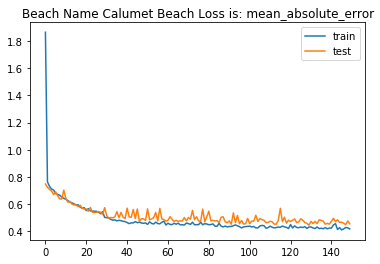

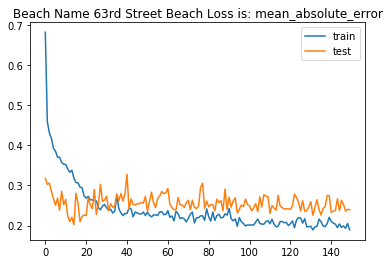

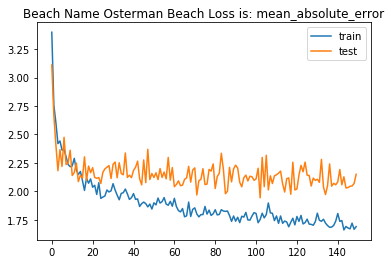

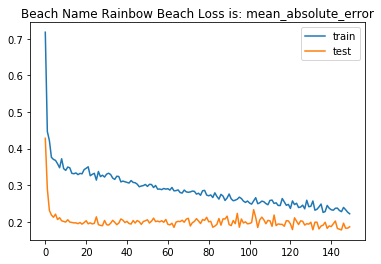

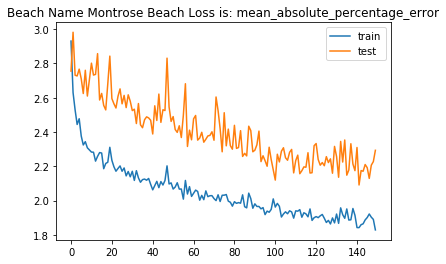

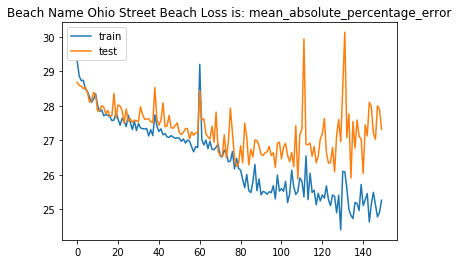

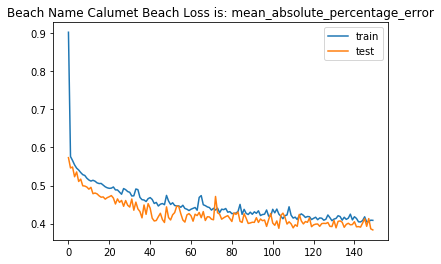

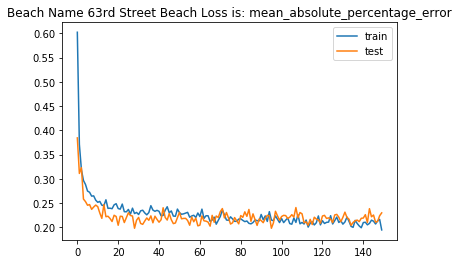

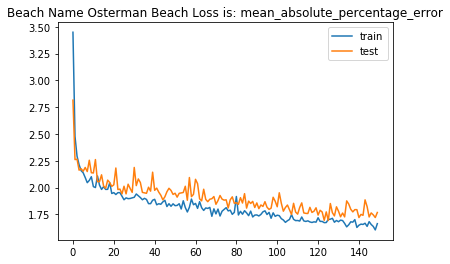

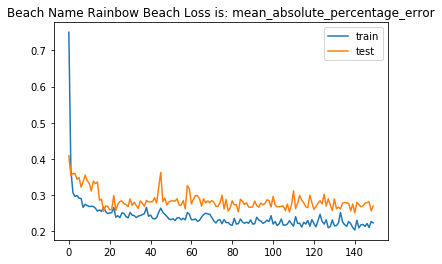

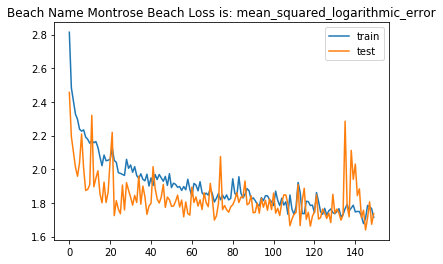

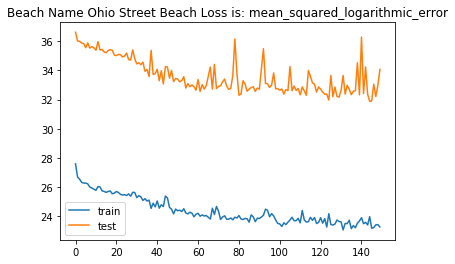

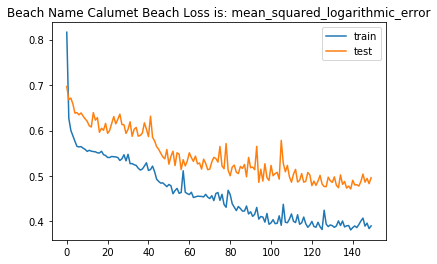

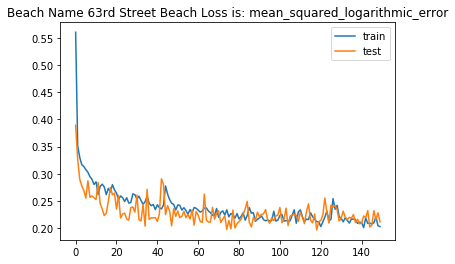

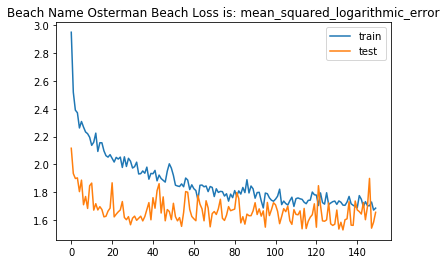

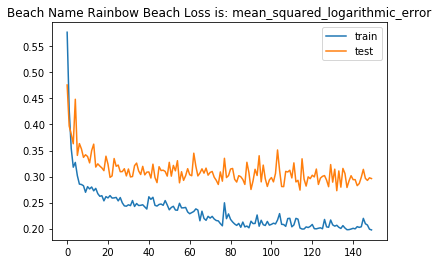

In [168]:
losses = ['mean_squared_error', 'mean_absolute_error','mean_absolute_percentage_error', 'mean_squared_logarithmic_error']

for loss in losses:
    i = 0

    
    
    for data in datasets_for_ANN:

        X = data[['Water Temperature', 'Wave Height', 'Wave Period', 'Month']]
        Y = data[['Turbidity']]

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

        
        history = model.fit(X_train, y_train, epochs=150, batch_size=10,validation_data=(X_test, y_test),verbose=0)

        train_mse = model.evaluate(X_train, y_train, verbose=0)
        test_mse = model.evaluate(X_test, y_test, verbose=0)
               
        plt.title('Beach Name ' + str(data['Beach Name'].values[0])+' Loss is: ' + str(loss))
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
    